In [35]:
import numpy as np
import matplotlib.pyplot as plt
import random
import pandas as pd
import seaborn as sn

## Data for toy experiment
We test this setup on the same setup as was used in this paper: 

(θ1, θ2) → (ya, yb) = (r1 cos θ1 + r2 cos(θ1 + θ2), r1 sin θ1 + r2 sin(θ1 + θ2)).

For the training set he used r1 = 2.0 and r2 = 1.3, random samples from a restricted range of
(θ1, θ2) were made, and Gaussian noise of magnitude 0.05 was added to the outputs.

In [36]:
def robot_arm(theta1, theta2):
    r1 = 2.0
    r2 = 1.3
    ya = r1*np.cos(theta1) + r2*np.cos(theta1 + theta2)
    yb = r1*np.sin(theta1) + r2*np.sin(theta1 + theta2)
    return ya, yb

Text(0, 0.5, 'a2')

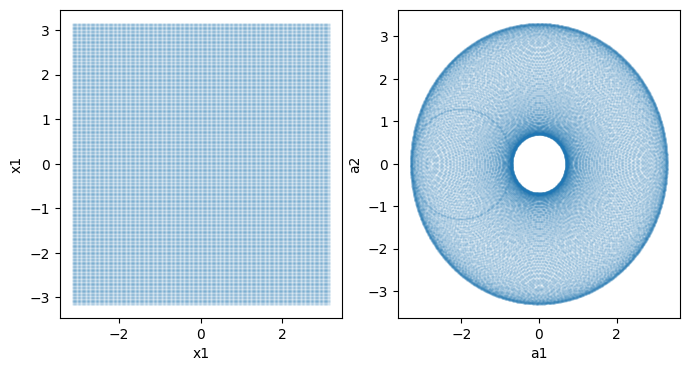

In [37]:
# Look at the mapping function
nx = 200
x1 = np.linspace(-np.pi, np.pi, nx)
x2 = np.linspace(-np.pi, np.pi, nx)

xx1, xx2 = np.meshgrid(x1, x2)

aa1, aa2 = robot_arm(xx1, xx2)

fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (8, 4))

ax[0].scatter(xx1, xx2, s=1, alpha=0.1)
ax[0].set_xlabel("x1")
ax[0].set_ylabel("x1")
ax[1].scatter(aa1, aa2, s=1, alpha=0.1)
ax[1].set_xlabel("a1")
ax[1].set_ylabel("a2")

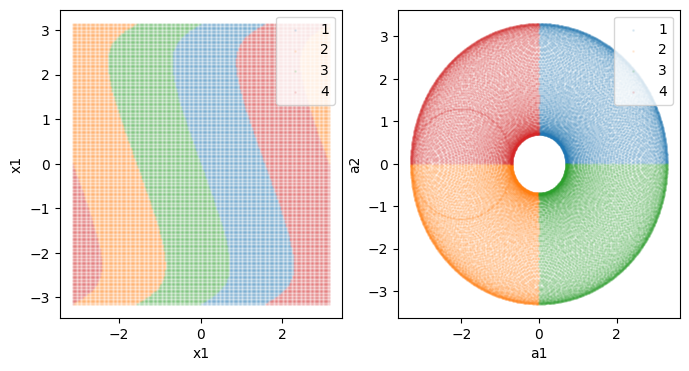

In [38]:
# What x1,x2 map to wich quadrant in a1, a2? These are our classes.

# classes: [+, +], [-, -], [+,-], [-, +] -> 1, 2, 3, 4
class1 = np.where(aa1 > 0, 1, 0)*np.where(aa2 > 0, 1, 0)
class2 = np.where(aa1 < 0, 1, 0)*np.where(aa2 < 0, 1, 0)
class3 = np.where(aa1 > 0, 1, 0)*np.where(aa2 < 0, 1, 0)
class4 = np.where(aa1 < 0, 1, 0)*np.where(aa2 > 0, 1, 0)
classes = {"1":class1, "2":class2, "3":class3, "4":class4}

fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (8, 4))

for key in classes.keys() :
    ax[0].scatter(xx1[np.nonzero(classes[key])], xx2[np.nonzero(classes[key])], s=1, alpha=0.1, label=key)
    ax[1].scatter(aa1[np.nonzero(classes[key])], aa2[np.nonzero(classes[key])], s=1, alpha=0.1, label=key)

ax[0].set_xlabel("x1")
ax[0].set_ylabel("x1")
ax[1].set_xlabel("a1")
ax[1].set_ylabel("a2")
ax[0].legend()
ax[1].legend()

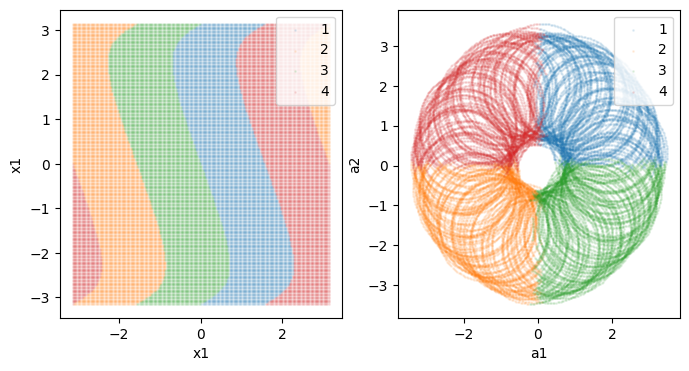

In [39]:
# Add noise to the data
aa1 = aa1 + np.random.normal(0,0.1,len(aa1))
aa2 = aa2 + np.random.normal(0,0.1,len(aa1))

fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (8, 4))

for key in classes.keys() :
    ax[0].scatter(xx1[np.nonzero(classes[key])], xx2[np.nonzero(classes[key])], s=1, alpha=0.1, label=key)
    ax[1].scatter(aa1[np.nonzero(classes[key])], aa2[np.nonzero(classes[key])], s=1, alpha=0.1, label=key)

ax[0].set_xlabel("x1")
ax[0].set_ylabel("x1")
ax[1].set_xlabel("a1")
ax[1].set_ylabel("a2")
ax[0].legend()
ax[1].legend()

Text(0, 0.5, 'a2')

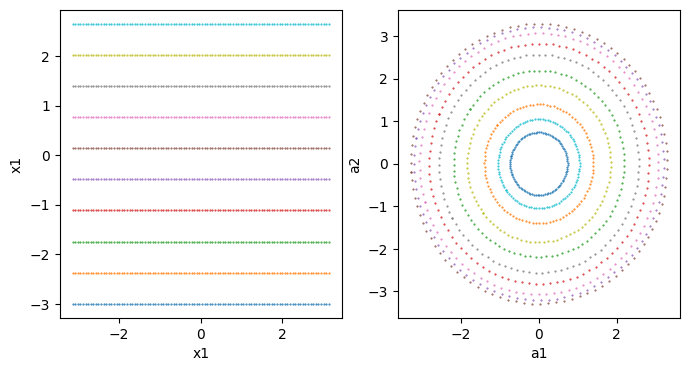

In [40]:
# Look at the mapping function
nx = 100
x1 = np.linspace(-np.pi, np.pi, nx)

fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (8, 4))
lines = 10
for i in range(lines):
    dx2 = 2*np.pi/lines
    x2 = 0*x1 -3 + i*dx2
    a1, a2 = robot_arm(x1, x2)
    ax[0].plot(x1, x2, marker='.', markersize=1, linestyle='none')
    ax[1].plot(a1, a2, marker='.', markersize=1, linestyle='none')

ax[0].set_xlabel("x1")
ax[0].set_ylabel("x1")
ax[1].set_xlabel("a1")
ax[1].set_ylabel("a2")

Text(0, 0.5, 'a2')

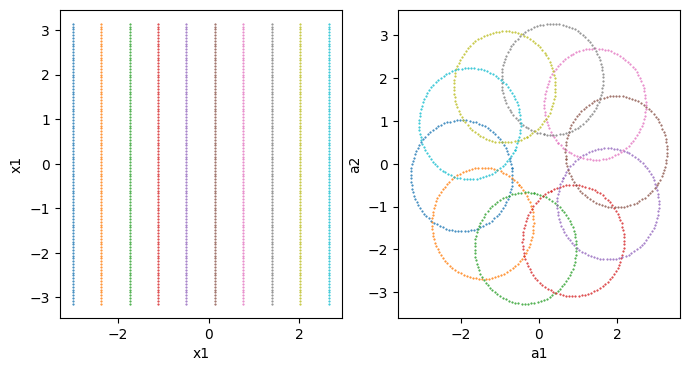

In [41]:
# Look at the mapping function
nx = 100
x2 = np.linspace(-np.pi, np.pi, nx)

fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (8, 4))
lines = 10
for i in range(lines):
    dx1 = 2*np.pi/lines
    x1 = 0*x2 -3 + i*dx1
    a1, a2 = robot_arm(x1, x2)
    ax[0].plot(x1, x2, marker='.', markersize=1, linestyle='none')
    ax[1].plot(a1, a2, marker='.', markersize=1, linestyle='none')

ax[0].set_xlabel("x1")
ax[0].set_ylabel("x1")
ax[1].set_xlabel("a1")
ax[1].set_ylabel("a2")

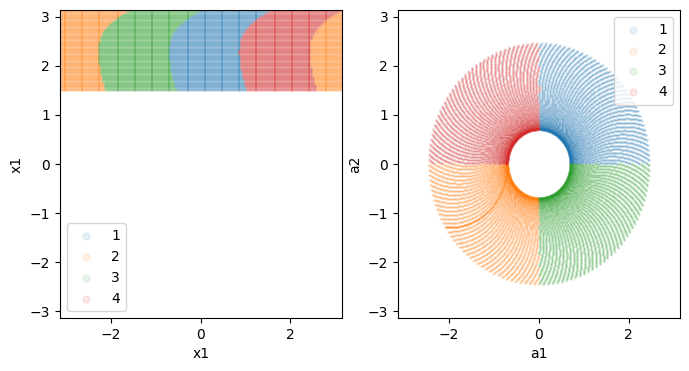

In [42]:
# Look at a subset
nx = 150
x1 = np.linspace(-np.pi, np.pi, nx)
x2 = np.linspace(1.5, np.pi, nx)

xx1, xx2 = np.meshgrid(x1, x2)

aa1, aa2 = robot_arm(xx1, xx2)

# classes: [+, +], [-, -], [+,-], [-, +] -> 1, 2, 3, 4
class1 = np.where(aa1 > 0, 1, 0)*np.where(aa2 > 0, 1, 0)
class2 = np.where(aa1 < 0, 1, 0)*np.where(aa2 < 0, 1, 0)
class3 = np.where(aa1 > 0, 1, 0)*np.where(aa2 < 0, 1, 0)
class4 = np.where(aa1 < 0, 1, 0)*np.where(aa2 > 0, 1, 0)
classes = {"1":class1, "2":class2, "3":class3, "4":class4}

fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (8, 4))

for key in classes.keys() :
    ax[0].scatter(xx1[np.nonzero(classes[key])], xx2[np.nonzero(classes[key])], s=1, alpha=0.1, label=key)
    ax[1].scatter(aa1[np.nonzero(classes[key])], aa2[np.nonzero(classes[key])], s=1, alpha=0.1, label=key)

ax[0].set_xlabel("x1")
ax[0].set_ylabel("x1")
ax[1].set_xlabel("a1")
ax[1].set_ylabel("a2")
for i in range(len(ax)):
    ax[i].set_xlim(-np.pi, np.pi)
    ax[i].set_ylim(-np.pi, np.pi)
    ax[i].legend(markerscale=5)

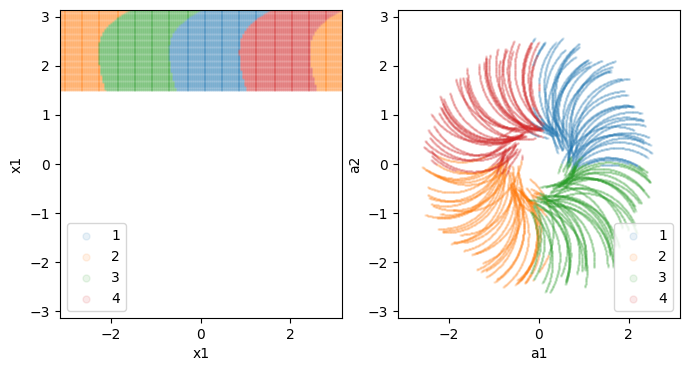

In [43]:
# Subset with noise
aa1 = aa1 + np.random.normal(0, 0.1, len(aa1))
aa2 = aa2 + np.random.normal(0, 0.1, len(aa2))

fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (8, 4))

for key in classes.keys() :
    ax[0].scatter(xx1[np.nonzero(classes[key])], xx2[np.nonzero(classes[key])], s=1, alpha=0.1, label=key)
    ax[1].scatter(aa1[np.nonzero(classes[key])], aa2[np.nonzero(classes[key])], s=1, alpha=0.1, label=key)

ax[0].set_xlabel("x1")
ax[0].set_ylabel("x1")
ax[1].set_xlabel("a1")
ax[1].set_ylabel("a2")
for i in range(len(ax)):
    ax[i].set_xlim(-np.pi, np.pi)
    ax[i].set_ylim(-np.pi, np.pi)
    ax[i].legend(markerscale=5)

Text(0, 0.5, 'a2')

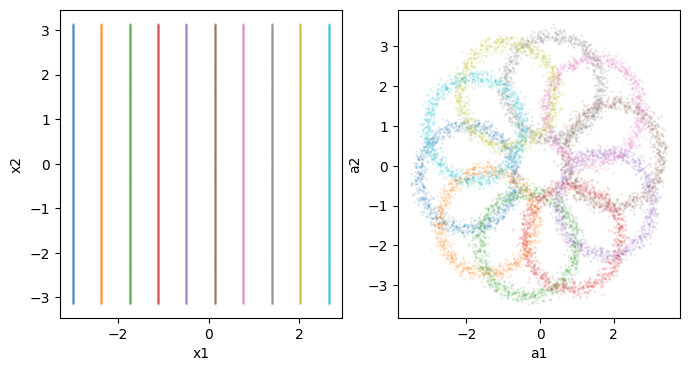

In [68]:
nx = 1000
x2 = np.linspace(-np.pi, np.pi, nx)

fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (8, 4))
lines = 10
for i in range(lines):
    dx1 = 2*np.pi/lines
    x1 = 0*x2 -3 + i*dx1
    a1, a2 = robot_arm(x1, x2)
    a1 = a1 + np.random.normal(0, 0.1, len(a1))
    a2 = a2 + np.random.normal(0, 0.1, len(a2))
    ax[0].scatter(x1, x2, s=1, alpha=0.1)
    ax[1].scatter(a1, a2, s=1, alpha=0.1)

ax[0].set_xlabel("x1")
ax[0].set_ylabel("x2")
ax[1].set_xlabel("a1")
ax[1].set_ylabel("a2")

In [67]:

# Generate training and calibration data

df_keys = ["x1", "x2", "c", "a1", "a2", "a1_noise", "a2_noise"]
df_train = pd.DataFrame(columns=df_keys)
df_cal = pd.DataFrame(columns=df_keys)
data = [df_train, df_cal]

for df in data:
    # Randomly sample from a subset of x1, x2:
    rng = np.random.default_rng()
    n_train = 200

    x1 = np.array([random.uniform(-np.pi, np.pi) for i in range(n_train)])
    x2 = np.array([random.uniform(1.5, np.pi) for i in range(n_train)])
    df["x1"] = x1
    df["x2"] = x2

    # Get robot arm value
    a1, a2 = robot_arm(x1, x2)
    df["a1"] = a1
    df["a2"] = a2

    # classes: [+, +], [-, -], [+,-], [-, +] -> 1, 2, 3, 4
    c1 = np.where(a1 > 0, 1, 0)*np.where(a2 > 0, 1, 0)
    c2 = np.where(a1 < 0, 1, 0)*np.where(a2 < 0, 1, 0)
    c3 = np.where(a1 > 0, 1, 0)*np.where(a2 < 0, 1, 0)
    c4 = np.where(a1 < 0, 1, 0)*np.where(a2 > 0, 1, 0)
    c_dict = {"1":c1, "2":c2, "3":c3, "4":c4}
    class_list = np.zeros(len(x1))
    for key in c_dict.keys():
        index = np.nonzero(c_dict[key])
        class_list[index] = key
    df["c"] = class_list

    # Add noise to the data
    a1 = a1 + np.random.normal(0,0.1,len(a1))
    a2 = a2 + np.random.normal(0,0.1,len(a1))
    df["a1_noise"] = a1
    df["a2_noise"] = a2


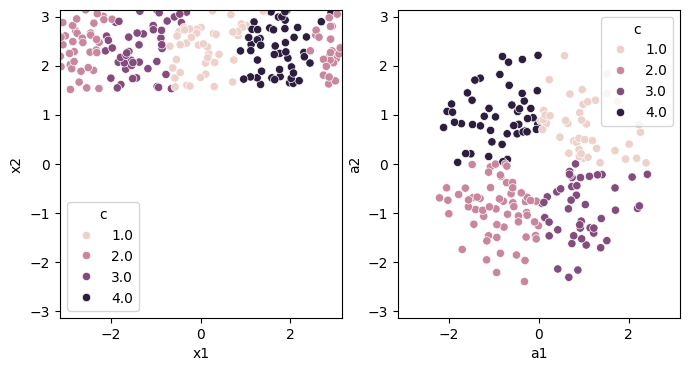

In [65]:
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (8, 4))
sn.scatterplot(df_train, x="x1", y = "x2", hue="c", ax=ax[0])
sn.scatterplot(df_train, x="a1", y = "a2", hue="c", ax=ax[1])

for i in range(len(ax)):
    ax[i].set_xlim(-np.pi, np.pi)
    ax[i].set_ylim(-np.pi, np.pi)

In [74]:

# Generate test data

df_keys = ["x1", "x2", "c", "a1", "a2", "a1_noise", "a2_noise"]
df_test = pd.DataFrame(columns=df_keys)

n_test = 2000

#x1 = np.array([random.uniform(-np.pi, np.pi) for i in range(n_test)])
x2_ = np.linspace(-np.pi, np.pi)

lines = 7
for i in range(lines):
    dx1 = 2*np.pi/lines
    x1 = 0*x2 -3 + i*dx1
    df["x1"] = pd.concat([df, pd.DataFrame(dict({"x1":x1}))], ignore_index=True)
    df["x2"] = pd.concat(df, pd.DataFrame({"x2":x2}))
    a1, a2 = robot_arm(x1, x2)
    df["a1"] = pd.concat(df, pd.DataFrame({"a2":a1}))
    df["a2"] = pd.concat(df, pd.DataFrame({"a2":a2}))
    a1 = a1 + np.random.normal(0, 0.1, len(a1))
    a2 = a2 + np.random.normal(0, 0.1, len(a2))
    

# classes: [+, +], [-, -], [+,-], [-, +] -> 1, 2, 3, 4
c1 = np.where(a1 > 0, 1, 0)*np.where(a2 > 0, 1, 0)
c2 = np.where(a1 < 0, 1, 0)*np.where(a2 < 0, 1, 0)
c3 = np.where(a1 > 0, 1, 0)*np.where(a2 < 0, 1, 0)
c4 = np.where(a1 < 0, 1, 0)*np.where(a2 > 0, 1, 0)
c_dict = {"1":c1, "2":c2, "3":c3, "4":c4}
class_list = np.zeros(len(x1))
for key in c_dict.keys():
    index = np.nonzero(c_dict[key])
    class_list[index] = key
#df["c"] = class_list



ValueError: Columns must be same length as key